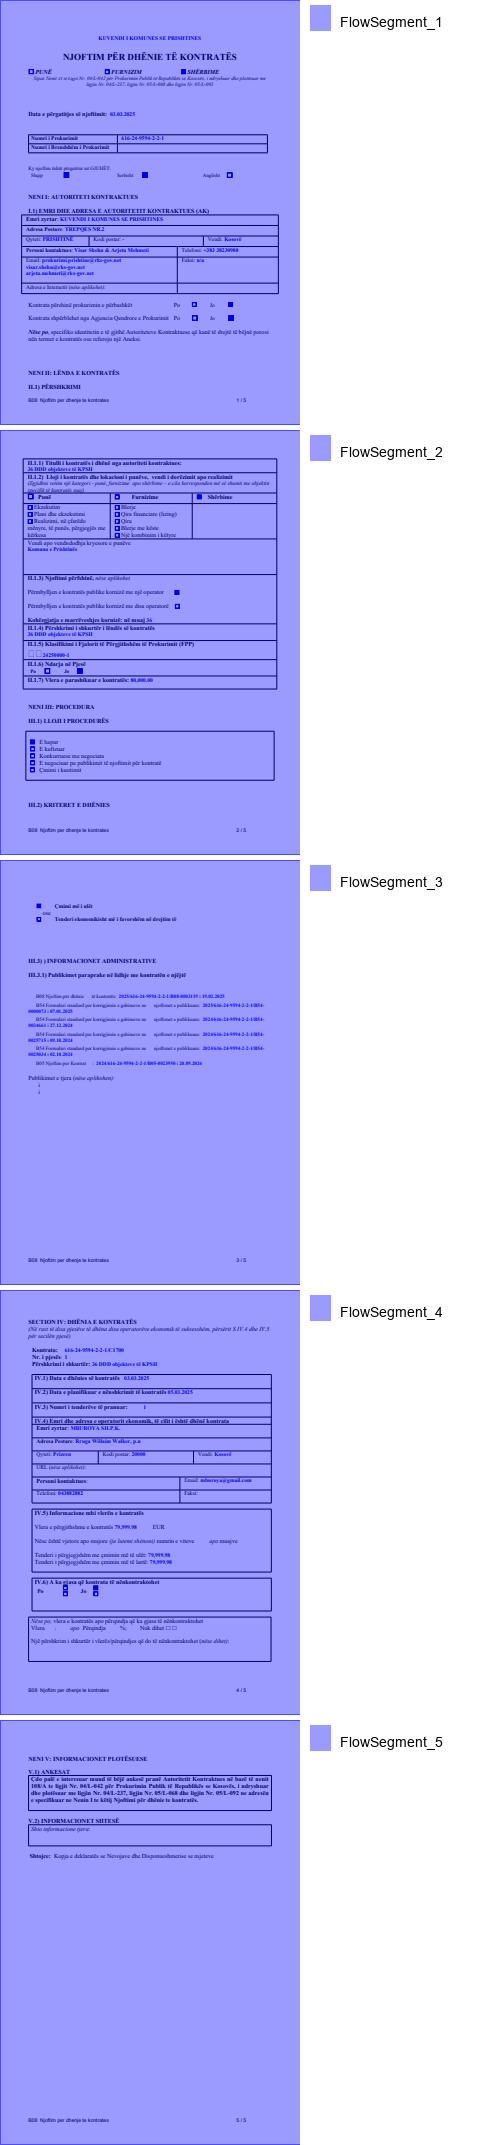

In [1]:
from natural_pdf import PDF
from natural_pdf import Flow

pdf = PDF("procurement-sample-2.pdf")
pdf.add_exclusion(lambda page: page.region(top=page.height - 60))

flow = Flow(pdf.pages, arrangement='vertical')
flow.show(width=300)

In [2]:
from natural_pdf import PDF
from natural_pdf import Flow

pdf = PDF("procurement-sample-2.pdf")
pdf.add_exclusion(lambda page: page.region(top=page.height - 60))

flow = Flow(pdf.pages, arrangement='vertical')
flow.show(width=600)

data = {}

data['winner'] = (
    flow
    .find(text="Emri zyrtar")
    .below(
        until='text:contains(Adresa Postare)',
        include_endpoint=False,
        include_source=True
    )
    .extract_text()
)

data['description'] = (
    flow
    .find(text="II.1.1")
    .below(
        until='text:contains(II.1.2)',
        include_endpoint=False
    )
    .extract_text(newlines = ' ')
)

data['postal address'] = (
    flow
    .find(text="Adresa Postare")
    .below(
        until='text:contains(Qyteti)',
        include_source=True,
        include_endpoint=False
    )
    .extract_text()
)

data['city'] = flow.find(text="Qyteti").right(until='text').extract_text()

data['country'] = flow.find(text="Vendi").right(until='text').extract_text()

data['value'] = flow.find(text="Vlera e përgjithshme e kontratës").right(until='text').extract_text()

data

{'winner': 'Emri zyrtar: KUVENDI I KOMUNES SE PRISHTINES',
 'description': 'II.1.1) Titulli i kontratës i dhënë nga autoriteti kontraktues: 36 DDD objekteve të KPSH',
 'postal address': 'Adresa Postare: TREPQES NR.2',
 'city': 'PRISHTINË',
 'country': 'Kosovë',
 'value': '79,999.98'}